In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests 

In [2]:
pip install requests 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Assign the link of the website from which we are going to scrape the data and assign it to variable named website_url.
website_url=requests.get('https://en.wikipedia.org/wiki/List_of_counties_in_Texas').text

In [4]:
# Parse HTML data into a beautiful object
soup = BeautifulSoup(website_url, 'xml')
Mytable = soup.find('table', { 'class':'wikitable sortable'})

In [5]:
# A title of the Wikipedia page
soup.title.string

'List of counties in Texas - Wikipedia'

In [6]:
# Convert Wikipedia table into a Python Dataframe. 
# Read the HTML table into a list of dataframe object using read_html(). This returns a list.
df=pd.read_html(str(Mytable))
# Convert list to dataframe
df=pd.DataFrame(df[0])
df.head()

,County,FIPS code[8],County seat[9],Est.[9],Origin,Etymology,Population[10],Area[9],Map
0,Anderson County,1,Palestine,1846,Houston County,"Kenneth Lewis Anderson (1805–1845), the last v...",57741,"1,071 sq mi(2,774 km2)",NaN
1,Andrews County,3,Andrews,1876,Bexar County,"Richard Andrews (1800–1835), the first Texan s...",17722,"1,501 sq mi(3,888 km2)",NaN
2,Angelina County,5,Lufkin,1846,Nacogdoches County,A Hainai Native American woman who assisted ea...,87805,"802 sq mi(2,077 km2)",NaN
3,Aransas County,7,Rockport,1871,Refugio County,"Aransas Bay, named in turn for an early Spanis...",25572,252 sq mi(653 km2),NaN
4,Archer County,9,Archer City,1858,Fannin County,"Branch Tanner Archer, a commissioner for the R...",8809,"910 sq mi(2,357 km2)",NaN


In [7]:
# Drop the unwanted columns
Data=df.drop(["Est.[9]", "County seat[9]","Etymology","Map"],axis=1)

In [8]:
Data=Data.rename(columns={ "FIPS code[8]":"FIPS ", "Population[10]":"Population", "Area[9]": "Area"})
Data.head(20)

,County,FIPS,Origin,Population,Area
0,Anderson County,1,Houston County,57741,"1,071 sq mi(2,774 km2)"
1,Andrews County,3,Bexar County,17722,"1,501 sq mi(3,888 km2)"
2,Angelina County,5,Nacogdoches County,87805,"802 sq mi(2,077 km2)"
3,Aransas County,7,Refugio County,25572,252 sq mi(653 km2)
4,Archer County,9,Fannin County,8809,"910 sq mi(2,357 km2)"
5,Armstrong County,11,Bexar County,1879,"914 sq mi(2,367 km2)"
6,Atascosa County,13,Bexar County,48981,"1,232 sq mi(3,191 km2)"
7,Austin County,15,One of the original 23 counties,29786,"653 sq mi(1,691 km2)"
8,Bailey County,17,Bexar County,7077,"827 sq mi(2,142 km2)"
9,Bandera County,19,Bexar County,22351,"792 sq mi(2,051 km2)"


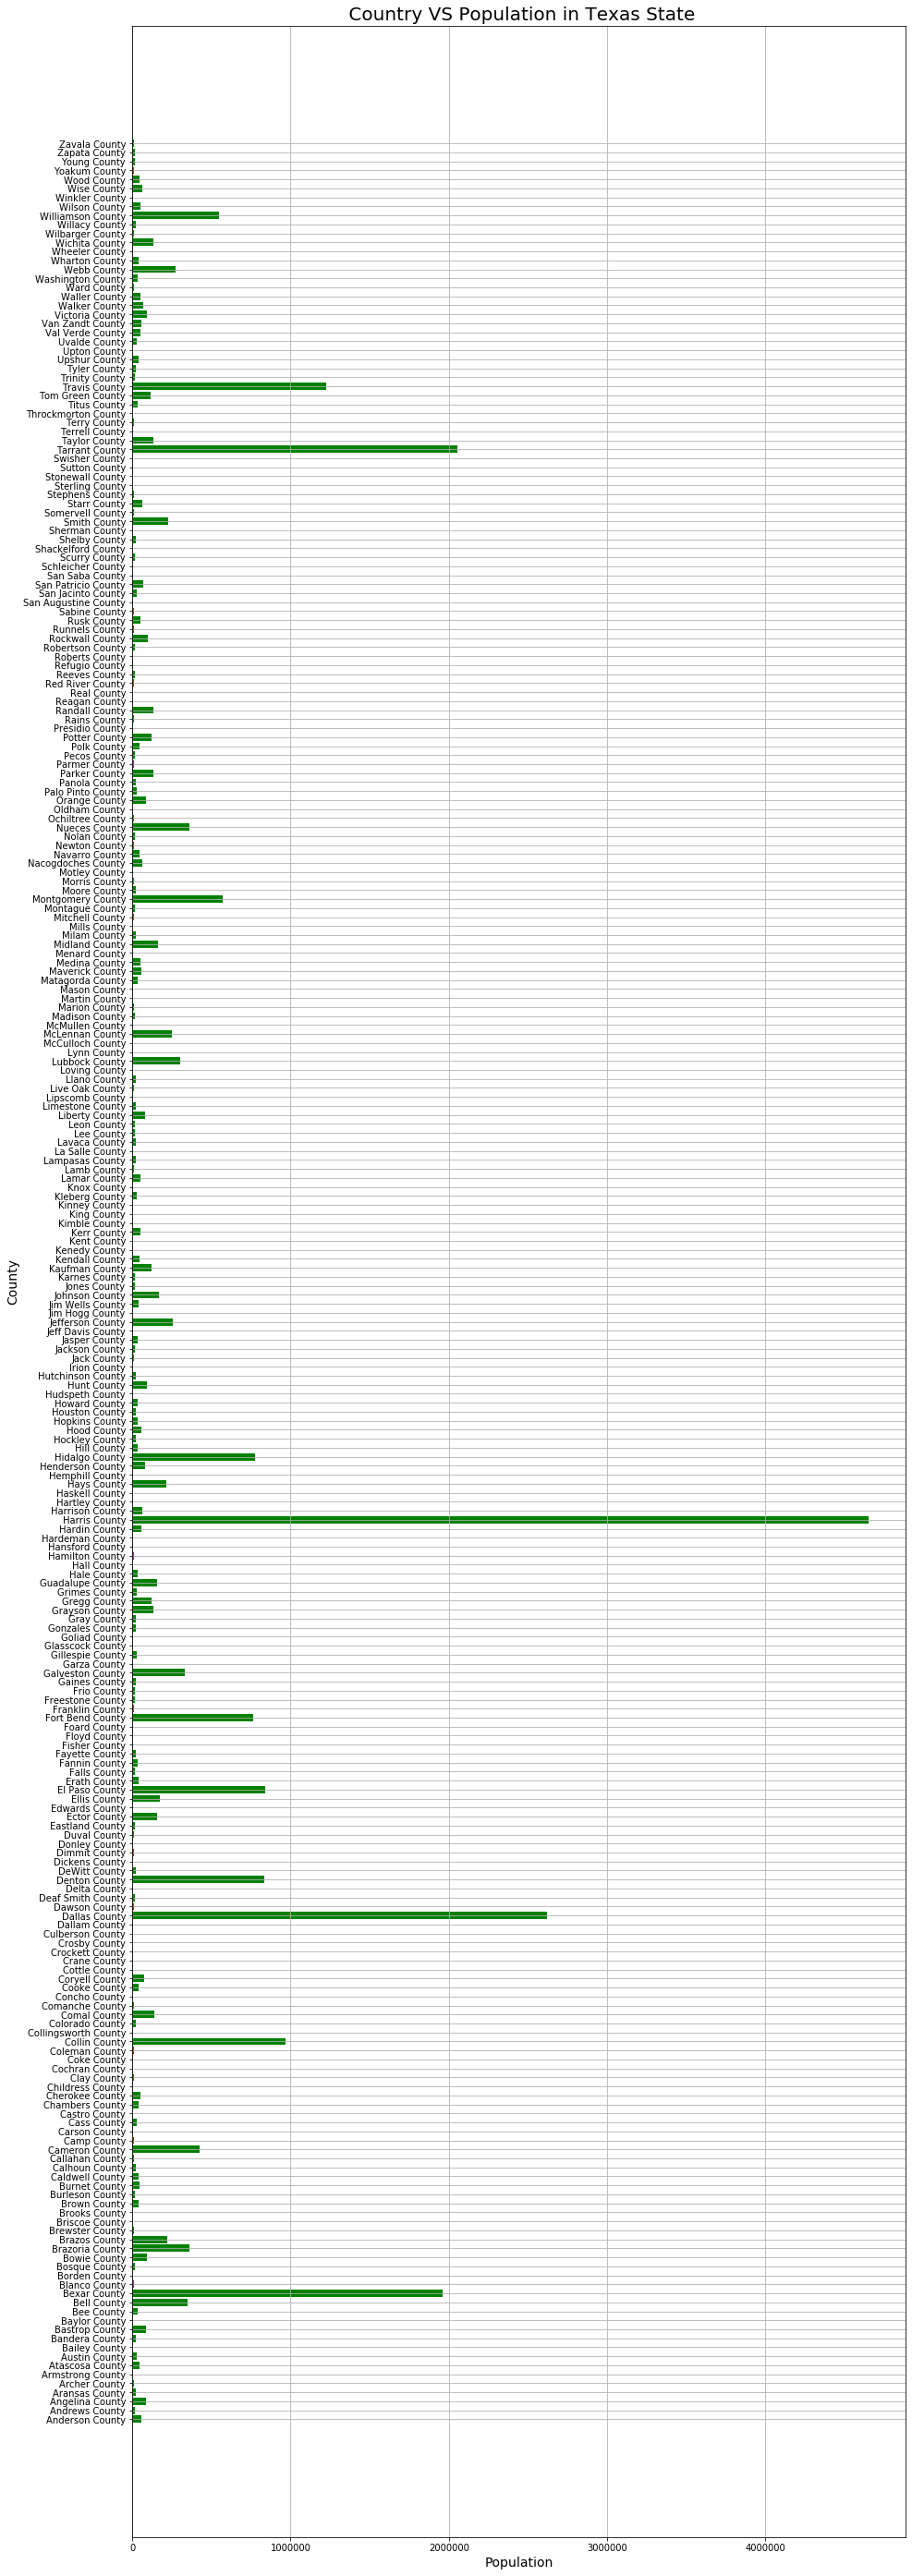

In [9]:
# Population Bar Chart based on the Population
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib as mpl

fig = plt.subplots(figsize =(15,50)) 
plt.barh(Data['County'], Data['Population'], color='green')
plt.title(' Country VS Population in Texas State', fontsize=20)
plt.xlabel('Population', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.grid(True)
plt.show()

In [10]:
# List 10 biggest Counties by Population in Texas 
LargestCounty=Data.groupby('County')['Population'].sum().nlargest(10)
print("10 biggest County in Texas State are :")
print(LargestCounty)

10 biggest County in Texas State are :
County
Harris County       4652980
Dallas County       2618148
Tarrant County      2054475
Bexar County        1958578
Travis County       1226698
Collin County        969603
El Paso County       840410
Denton County        836210
Hidalgo County       774769
Fort Bend County     764828
Name: Population, dtype: int64


In [11]:
# List 10 smallest Counties by Population in Texas 
SmallestCounty=Data.groupby('County')['Population'].sum().nsmallest(10)

print("10 biggest County in Texas State are :")
print(SmallestCounty)

10 biggest County in Texas State are :
County
Loving County       134
King County         296
Kenedy County       417
Borden County       673
Kent County         763
McMullen County     778
Terrell County      810
Roberts County      938
Foard County       1222
Motley County      1230
Name: Population, dtype: int64


In [12]:
# Confirmed COVID 19 data set downloaded from Coronavirus Disease 2019 (COVID-19) (texas.gov) website.  
# The downloaded file is in excel. Therefore, import an excel file into Python using pandas.read_excel() function
# COVID-19 Total Cases by County, From 03/04/2020 to 12/21/2020 @ 9:30 AM CST 
df=pd.read_excel("C:/00-DataScience/Capstone-Project-Week5/Texas_COVID19_ CaseCount_by_County.xlsx")

In [13]:
# df.head(n)- to shows the first 5 rows of dataframe
df.head()

,County Name,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,Cases 03-13,Cases 03-15,...,Cases 12-12,Cases 12-13,Cases 12-14,Cases 12-15,Cases 12-16,Cases 12-17,Cases 12-18,Cases 12-19,Cases 12-20,Cases 12-21
0,Anderson,0,0,0,0,0,0,0,0,0,...,3283,3283,3283,3297,3321,3420,3428,3444,3444,3444
1,Andrews,0,0,0,0,0,0,0,0,0,...,1189,1189,1189,1237,1271,1271,1308,1308,1308,1330
2,Angelina,0,0,0,0,0,0,0,0,0,...,2887,3022,3022,3045,3089,3094,3094,3204,3204,3204
3,Aransas,0,0,0,0,0,0,0,0,0,...,474,479,479,485,492,500,501,503,515,515
4,Archer,0,0,0,0,0,0,0,0,0,...,350,350,350,375,380,385,395,399,399,399


In [14]:
# df.tail(n)- to shows the bottom 5 rows of dataframe
df.tail()

,County Name,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,Cases 03-13,Cases 03-15,...,Cases 12-12,Cases 12-13,Cases 12-14,Cases 12-15,Cases 12-16,Cases 12-17,Cases 12-18,Cases 12-19,Cases 12-20,Cases 12-21
249,Wood,0,0,0,0,0,0,0,0,0,...,1052,1052,1052,1072,1074,1085,1089,1108,1108,1108
250,Yoakum,0,0,0,0,0,0,0,0,0,...,675,675,675,678,679,690,690,730,730,730
251,Young,0,0,0,0,0,0,0,0,0,...,1091,1091,1091,1122,1136,1158,1177,1191,1191,1191
252,Zapata,0,0,0,0,0,0,0,0,0,...,645,659,659,673,697,707,738,753,757,757
253,Zavala,0,0,0,0,0,0,0,0,0,...,739,739,739,741,756,765,774,774,774,774


In [15]:
# Check the shape of the dataframe
df.shape

(254, 291)

In [16]:
columns=df.columns
columns

Index(['County Name', 'Cases 03-04', 'Cases 03-05', 'Cases 03-06',
       'Cases 03-09', 'Cases 03-10', 'Cases 03-11', 'Cases 03-12',
       'Cases 03-13', 'Cases 03-15',
       ...
       'Cases 12-12', 'Cases 12-13', 'Cases 12-14', 'Cases 12-15',
       'Cases 12-16', 'Cases 12-17', 'Cases 12-18', 'Cases 12-19',
       'Cases 12-20', 'Cases 12-21'],
      dtype='object', length=291)

In [17]:
COVID19_Dataset_Aggregated=df.groupby("County Name").sum()

In [18]:
COVID19_Dataset_Aggregated.head()

,Cases 03-04,Cases 03-05,Cases 03-06,Cases 03-09,Cases 03-10,Cases 03-11,Cases 03-12,Cases 03-13,Cases 03-15,Cases 03-16,...,Cases 12-12,Cases 12-13,Cases 12-14,Cases 12-15,Cases 12-16,Cases 12-17,Cases 12-18,Cases 12-19,Cases 12-20,Cases 12-21
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0,0,0,0,0,0,0,0,0,0,...,3283,3283,3283,3297,3321,3420,3428,3444,3444,3444
Andrews,0,0,0,0,0,0,0,0,0,0,...,1189,1189,1189,1237,1271,1271,1308,1308,1308,1330
Angelina,0,0,0,0,0,0,0,0,0,0,...,2887,3022,3022,3045,3089,3094,3094,3204,3204,3204
Aransas,0,0,0,0,0,0,0,0,0,0,...,474,479,479,485,492,500,501,503,515,515
Archer,0,0,0,0,0,0,0,0,0,0,...,350,350,350,375,380,385,395,399,399,399


In [19]:
COVID19_Dataset_Aggregated.shape

(254, 290)

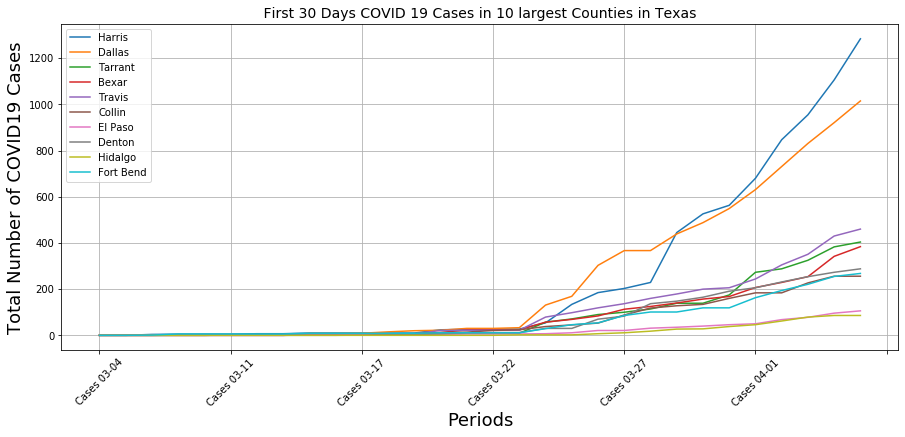

In [20]:
# #Spread of the COVID 19 virus in 10 largest country for the first 30 days

fig = plt.subplots(figsize =(15,6)) 
COVID19_Dataset_Aggregated.loc["Harris"][:30].plot()
COVID19_Dataset_Aggregated.loc["Dallas"][:30].plot()
COVID19_Dataset_Aggregated.loc["Tarrant"][:30].plot()
COVID19_Dataset_Aggregated.loc["Bexar"][:30].plot()
COVID19_Dataset_Aggregated.loc["Travis"][:30].plot()
COVID19_Dataset_Aggregated.loc["Collin"][:30].plot()
COVID19_Dataset_Aggregated.loc["El Paso"][:30].plot()
COVID19_Dataset_Aggregated.loc["Denton"][:30].plot()
COVID19_Dataset_Aggregated.loc["Hidalgo"][:30].plot()
COVID19_Dataset_Aggregated.loc["Fort Bend"][:30].plot()
plt.title(' First 30 Days COVID 19 Cases in 10 largest Counties in Texas ', fontsize=14)
plt.xlabel('Periods', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Total Number of COVID19 Cases', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

# First 30 days Data Analysis in 10 largest countries ( Harris,Dallas,Tarrant,Bexar, Travis,Collin,El Paso, Denton, Hidalgo, Fort Bend ) in Texas 

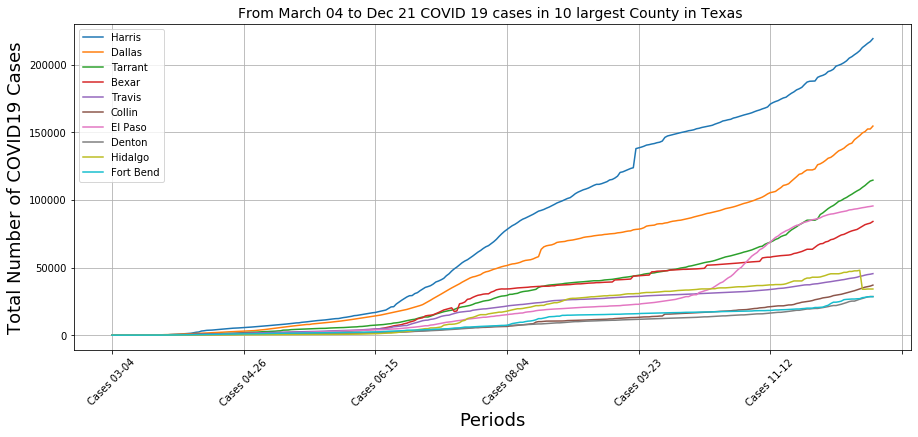

In [21]:
# COVID19 Cases Analysis for 10  largest County by Population in Texas State

fig = plt.subplots(figsize =(15,6))
COVID19_Dataset_Aggregated.loc["Harris"].plot()
COVID19_Dataset_Aggregated.loc["Dallas"].plot()
COVID19_Dataset_Aggregated.loc["Tarrant"].plot()
COVID19_Dataset_Aggregated.loc["Bexar"].plot()
COVID19_Dataset_Aggregated.loc["Travis"].plot()
COVID19_Dataset_Aggregated.loc["Collin"].plot()
COVID19_Dataset_Aggregated.loc["El Paso"].plot()
COVID19_Dataset_Aggregated.loc["Denton"].plot()
COVID19_Dataset_Aggregated.loc["Hidalgo"].plot()
COVID19_Dataset_Aggregated.loc["Fort Bend"].plot()
plt.title('From March 04 to Dec 21 COVID 19 cases in 10 largest County in Texas ', fontsize=14)
plt.xlabel('Periods', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Total Number of COVID19 Cases', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

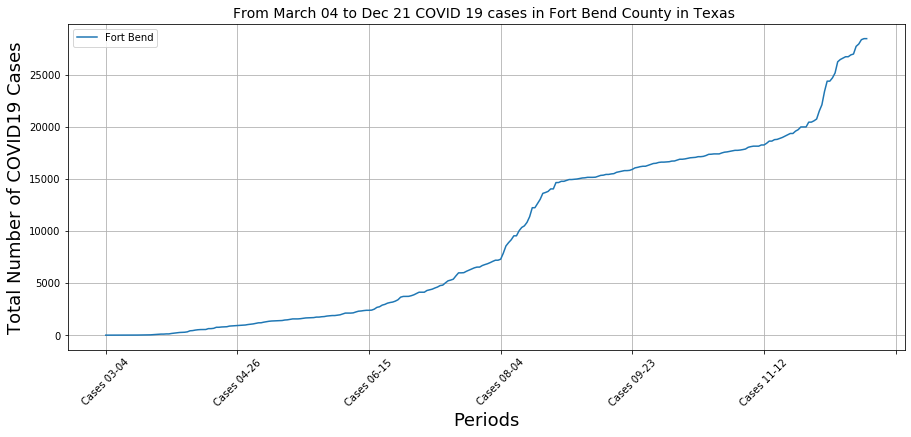

In [22]:
# COVID19 Cases Analysis for 10  largest County by Population in Texas State

fig = plt.subplots(figsize =(15,6))
COVID19_Dataset_Aggregated.loc["Fort Bend"].plot()
plt.title('From March 04 to Dec 21 COVID 19 cases in Fort Bend County in Texas ', fontsize=14)
plt.xlabel('Periods', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Total Number of COVID19 Cases', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

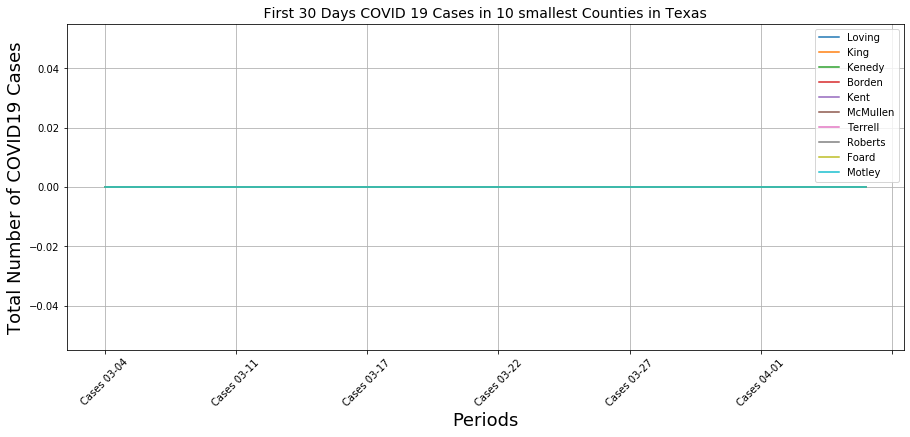

In [23]:
# COVID19 Cases Analysis for 10 smallest County by Population in Texas State
fig = plt.subplots(figsize =(15,6))
COVID19_Dataset_Aggregated.loc["Loving"][:30].plot()
COVID19_Dataset_Aggregated.loc["King"][:30].plot()
COVID19_Dataset_Aggregated.loc["Kenedy"][:30].plot()
COVID19_Dataset_Aggregated.loc["Borden"][:30].plot()
COVID19_Dataset_Aggregated.loc["Kent"][:30].plot()
COVID19_Dataset_Aggregated.loc["McMullen"][:30].plot()
COVID19_Dataset_Aggregated.loc["Terrell"][:30].plot()
COVID19_Dataset_Aggregated.loc["Roberts"][:30].plot()
COVID19_Dataset_Aggregated.loc["Foard"][:30].plot()
COVID19_Dataset_Aggregated.loc["Motley"][:30].plot()

plt.title(' First 30 Days COVID 19 Cases in 10 smallest Counties in Texas ', fontsize=14)
plt.xlabel('Periods', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Total Number of COVID19 Cases', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()


# There were no COVID 19 confirmed case first 30 days in 10 smallest countries ( Loving,King,Kenedy, Borden,Kent,McMullen,Terrell,Roberts, Foard, Motley ) in Texas 

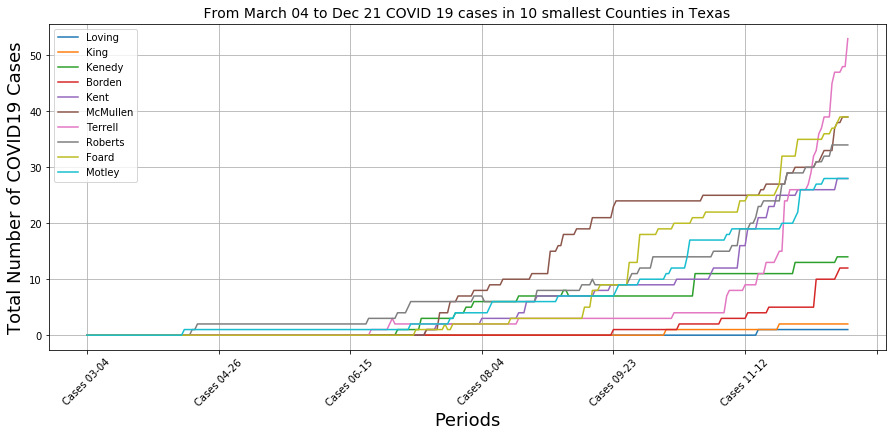

In [24]:
# COVID19 Cases Analysis for 10 smallest County by Population in Texas State
fig = plt.subplots(figsize =(15,6))
COVID19_Dataset_Aggregated.loc["Loving"].plot()
COVID19_Dataset_Aggregated.loc["King"].plot()
COVID19_Dataset_Aggregated.loc["Kenedy"].plot()
COVID19_Dataset_Aggregated.loc["Borden"].plot()
COVID19_Dataset_Aggregated.loc["Kent"].plot()
COVID19_Dataset_Aggregated.loc["McMullen"].plot()
COVID19_Dataset_Aggregated.loc["Terrell"].plot()
COVID19_Dataset_Aggregated.loc["Roberts"].plot()
COVID19_Dataset_Aggregated.loc["Foard"].plot()
COVID19_Dataset_Aggregated.loc["Motley"].plot()

plt.title(' From March 04 to Dec 21 COVID 19 cases in 10 smallest Counties in Texas ', fontsize=14)
plt.xlabel('Periods', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Total Number of COVID19 Cases', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Harris County COVID 19 Data Analysis 
import pandas as pd 
HarrisData=COVID19_Dataset_Aggregated.loc["Harris"]
print(HarrisData)

Cases 03-04         0
Cases 03-05         0
Cases 03-06         4
Cases 03-09         5
Cases 03-10         5
                ...  
Cases 12-17    212686
Cases 12-18    214180
Cases 12-19    215779
Cases 12-20    217086
Cases 12-21    219265
Name: Harris, Length: 290, dtype: int64
